In [2]:
from helper import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# returns of load_csv_data function
"""
x_train (np.array): training data
x_test (np.array): test data
y_train (np.array): labels for training data in format (-1,1)
train_ids (np.array): ids of training data
test_ids (np.array): ids of test data
"""
# load data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(".\dataset_to_release", sub_sample=False)

In [4]:
n_unique_vals_per_feature = []
for ind in range(x_train.shape[1]):
    n_unique_vals_per_feature.append(len(np.unique(x_train[:, ind])))

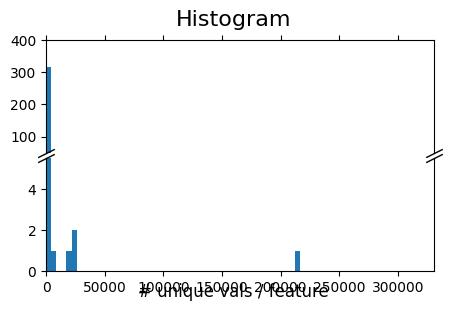

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,3))
fig.subplots_adjust(hspace=0.05) 

# plot the same data on both axes
ax1.hist(n_unique_vals_per_feature, bins=50)
ax2.hist(n_unique_vals_per_feature, bins=50)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(50, 400)  # outliers only
ax2.set_ylim(0, 5.5)  # most of the data

ax1.set_xlim([0, int(x_train.shape[0]*1.007)])
ax2.set_xlim([0, int(x_train.shape[0]*1.007)])

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#plt.xlabel('Number of unique values per feature')
#plt.ylabel('y') 
fig.suptitle('Histogram', fontsize=16)
fig.supxlabel('# unique vals / feature')
plt.show()

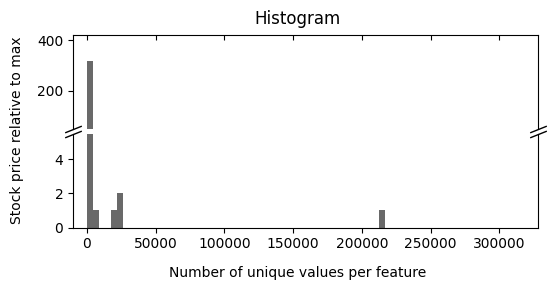

In [165]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,2.5))
fig.subplots_adjust(hspace=0.05) 

# plot the same data on both axes
ax1.hist(n_unique_vals_per_feature, bins=50, color="dimgray")
ax2.hist(n_unique_vals_per_feature, bins=50, color="dimgray")

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(50, 420)  # outliers only
ax2.set_ylim(0, 5.5)  # most of the data

ax1.set_xlim([-10000, int(x_train.shape[0])])
ax2.set_xlim([-10000, int(x_train.shape[0])])

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(axis='x', direction='in')
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .4  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.supxlabel('Number of unique values per feature', fontsize='medium', y=-0.1)
fig.suptitle('Histogram')
fig.supylabel('Stock price relative to max', fontsize='medium')
plt.show()

In [58]:
# the threshold is the maximal percentage of NaN values for a given feature
# if the feature contains a higher percentage of NaN values than the threshold, the feature will be sorted out
thresholds = np.array([0.2, 0.5, 0.8, 1.0])
max_num_NaN_per_features = (thresholds*x_train.shape[0]).astype(int)

# counting the number of NaN values for each feature
num_NaN_per_feature = []
for ind in range(x_train.shape[1]):
    num_NaN = np. count_nonzero(np. isnan(x_train[:, ind]))
    num_NaN_per_feature.append(num_NaN)

# creating a binary matrix of features to be included for each threshold
#included_features = np.zeros((len(threshold), x_train.shape[1]))

num_features_per_threshold= [] #for plotting
num_NaN_per_point_and_threshold = []
isNaN = np.isnan(x_train)
for max_num_NaN_per_feature in max_num_NaN_per_features:
    included_features = num_NaN_per_feature <= max_num_NaN_per_feature
    num_features_per_threshold.append(np.count_nonzero(included_features))
    isNaN_for_threshold = (isNaN*included_features)
    num_NaN_per_point = []
    for ind in range(isNaN_for_threshold.shape[0]):
        num_NaN = np.count_nonzero(isNaN_for_threshold[ind, :])
        num_NaN_per_point.append(num_NaN)
    num_NaN_per_point_and_threshold.append(num_NaN_per_point)

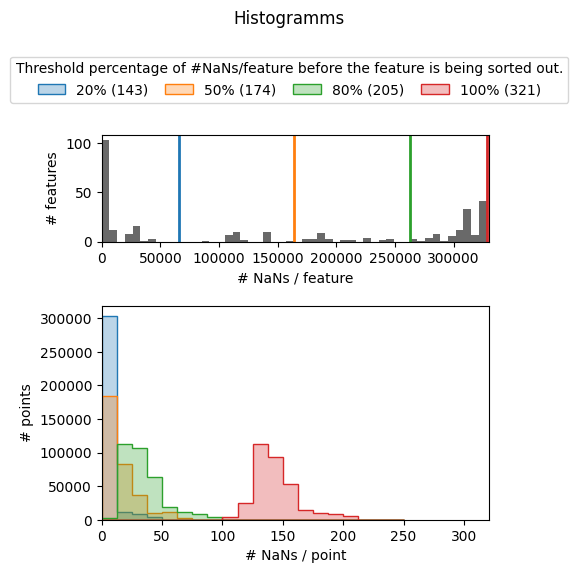

In [59]:
fig, axs = plt.subplots(2, height_ratios=[1, 2], figsize=(5,5))
plt.subplots_adjust(hspace=.4)
fig.suptitle('Histogramms', y=1.13)

axs[0].hist(num_NaN_per_feature, bins=50, color="dimgray")
#ax.set_ylim([0, 10])
axs[0].set_xlim([0, int(x_train.shape[0]*1.007)])
axs[0].set_xlabel('# NaNs / feature')
axs[0].set_ylabel('# features') 
#plt.title('Histogram')
for ind, max_num_NaN_per_feature in enumerate(max_num_NaN_per_features):
    axs[0].axvline(max_num_NaN_per_feature, lw=2, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][ind])

for ind, data in enumerate(num_NaN_per_point_and_threshold):
    axs[1].hist(data, 
                bins=20, 
                range=(0, 250), 
                color=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 0.3), 
                histtype='stepfilled', 
                ec=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 1.0), 
                label= str(int(thresholds[ind]*100.0))+"% (" + str(num_features_per_threshold[ind]) + ")" )
    # alpha=1.0/(ind*.5+1.0)
#axs[1] = plt.gca()
#ax.set_ylim([0, 60000])
axs[1].set_xlim([0, 321])
axs[1].set_xlabel('# NaNs / point')
axs[1].set_ylabel('# points') 
#axs[1].set_title('Histogram')
#axs[1].legend(title="Max NaN ratio threshold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncols=4, columnspacing=1.2, title="Threshold percentage of #NaNs/feature before the feature is being sorted out.")
# bbox_to_anchor=(0.85, 1.02, 0.2, 0.05), ncols=2, columnspacing=.5,
plt.show() 

In [6]:
# Get the header row of data
data_path = ".\dataset_to_release"
x_header = np.genfromtxt(
        os.path.join(data_path, "x_train.csv"), dtype=(str), delimiter=",", max_rows=1
    )[1:]

In [ ]:
unique = np.unique(x_train[:, 10])

In [ ]:
print(unique)

In [7]:
uniques_per_feature = []
for indx in range(x_train.shape[1]):
    uniques_per_feature.append(np.unique(x_train[:, indx]))

In [8]:
# replace the nan values in 'uniques_per_feature' by -1
for ind, feature in enumerate(uniques_per_feature):
    feature_NaN = np.isnan(feature)
    if any(feature_NaN):
        NaN_pos = np.nonzero(feature_NaN)[0][0]
        feature[NaN_pos] = -1

In [9]:
dead_indices = []
unique_answers = []
num_of_same_features_for_each_feature = np.zeros(len(uniques_per_feature), dtype=int)
counters = []
ind = 0
while ind < len(uniques_per_feature):
    if ind in dead_indices:
        ind = ind + 1
    else:
        unique_answers.append(uniques_per_feature[ind])
        count = 0
        deads = [] 
        for i in range(ind, len(uniques_per_feature)):
            if len(uniques_per_feature[ind]) == len(uniques_per_feature[i]):
                if set(uniques_per_feature[ind]) == set(uniques_per_feature[i]):
                    deads.append(i)
                    count = count + 1
        for j in deads:
            num_of_same_features_for_each_feature[j] = count
        dead_indices = dead_indices + deads
        counters.append(count)
        ind = ind + 1

In [113]:
print(n_unique_vals_per_feature)
print(num_of_same_features_for_each_feature)


[53, 12, 414, 12, 31, 2, 2, 21780, 21780, 2, 3, 2, 2, 3, 3, 17, 13, 12, 2, 2, 3, 3, 2, 3, 5, 26, 8, 34, 33, 34, 4, 5, 5, 8, 7, 5, 4, 7, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 7, 99, 2, 7, 7, 5, 5, 9, 5, 5, 9, 26, 11, 5, 551, 143, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 11, 6, 41, 49, 44, 59, 110, 135, 109, 116, 104, 134, 5, 78, 116, 195, 79, 100, 169, 102, 5, 5, 6, 14, 9, 5, 29, 14, 5, 5, 413, 12, 5, 6, 4, 80, 73, 48, 42, 46, 8, 5, 5, 6, 18, 8, 7, 16, 5, 5, 9, 5, 9, 8, 8, 11, 9, 5, 5, 4, 4, 5, 8, 8, 8, 8, 5, 5, 137, 5, 73, 4, 9, 12, 19, 26, 9, 8, 7, 10, 5, 5, 5, 6, 5, 4, 5, 7, 5, 5, 5, 7, 6, 6, 5, 5, 8, 5, 8, 5, 8, 5, 5, 8, 5, 8, 5, 5, 9, 5, 5, 5, 5, 8, 8, 6, 9, 9, 9, 7, 94, 7, 93, 7, 7, 4, 9, 5, 5, 8, 7, 18, 18, 18, 18, 18, 18, 18, 18, 5, 5, 8, 4, 5, 1306, 1305, 12, 5528, 4, 10, 10, 20453, 3, 107, 216913, 3, 3, 3, 4, 4, 3, 3, 4, 3, 10, 9, 3, 9, 3, 6, 6, 14, 3, 63, 6, 53, 104, 542, 3525, 5, 3, 7, 5, 6, 5, 3, 4, 36, 3, 237, 3, 98, 122, 97, 103, 93, 118, 3, 5, 2, 2, 501, 1025, 3, 3, 2, 2, 3, 3, 3, 30, 3

In [8]:
x = [1, 2]
x = x + [3, 4]
print(x)

print(3 in x)


[1, 2, 3, 4]
True


In [178]:
# !!! Need to find alternative, becasue no external libraries allowed !!!
from operator import itemgetter

In [180]:
data = list(zip(counters, unique_answers))
data_sorted = sorted(data, key=itemgetter(0), reverse=True)

In [182]:
# !!! Need to find alternative, becasue no external libraries allowed !!!
import pandas as pd

In [183]:
df = pd.DataFrame(data_sorted)

In [188]:
print(df.head(20))

     0                                                  1
0   62                         [1.0, 2.0, 7.0, 9.0, -1.0]
1   21                                    [1.0, 2.0, 9.0]
2   15          [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 9.0, -1.0]
3   11               [1.0, 2.0, 3.0, 4.0, 7.0, 9.0, -1.0]
4    9                               [1.0, 2.0, 7.0, 9.0]
5    8  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
6    7                                   [1.0, 2.0, -1.0]
7    7                              [1.0, 2.0, 9.0, -1.0]
8    6                                        [1.0, -1.0]
9    6                    [1.0, 2.0, 3.0, 7.0, 9.0, -1.0]
10   5     [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, -1.0]
11   4     [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, -1.0]
12   4                              [1.0, 2.0, 7.0, -1.0]
13   4                               [1.0, 2.0, 3.0, 9.0]
14   4                          [1.0, 2.0, 3.0, 4.0, 9.0]
15   4                                         [0.0, 1.0]
16   3        

In [ ]:
# figure out the possible feature 

In [47]:
print(type(num_of_same_features_for_each_feature))

<class 'numpy.ndarray'>


In [51]:
# useful (0, 1) [example id's]
# categorical or continuous (0: categorical, 1; continuous)
print(ds.T.shape)

#np.savetxt("save.csv",ds.T, fmt='%i', delimiter=",", header=x_header[1:])

name = "save.csv"
with open(name, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # write the header
    writer.writerow(x_header[1:])
    # write the data
    writer.writerow(n_unique_vals_per_feature)
    writer.writerow(num_of_same_features_for_each_feature.tolist())

(321, 2)


In [59]:
ana = np.genfromtxt(
        os.path.join("", "save.csv"), delimiter=",", skip_header=1
    ).astype(dtype=int)

In [61]:
print(ana.shape)

(2, 321)


In [ ]:
# data_analysis.csv structure
# row0: strings
# row1: # unique vals per feature
# row2: # instances of same unique vals
# row3: useful (yes=1, no=0)
# row4: medical (yes=1, no=0) [exceptions: EDUCA]

# review: HHADULT, PHYSHLTH, MENTHLTH, POORHLTH, DIABAGE2, CHILDREN, WEIGHT2, HEIGHT3, ALCDAY5, AVEDRNK2, DRNK3GE5, MAXDRNKS, [ FRUITJU1, FRUIT1, FVBEANS, FVGREEN, FVORANG, VEGETAB1 ], EXRACT11, [ EXEROFT1, EXERHMM1, EXRACT21, EXEROFT2, EXERHMM2, STRENGTH ], FLSHTMY2, BLDSUGAR, FEETCHK2, DOCTDIAB, CHKHEMO3, FEETCHK, 


# difficult threshold features: HHADULT, PHYSHLTH, MENTHLTH, POORHLTH, DIABAGE2, CHILDREN, WEIGHT2

# Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7151140/
# One hot encoding 

In [36]:
threshold = 20
arr2 = np.array(n_unique_vals_per_feature)
clipped_data_low = arr2[arr2 <= threshold]
print("#features if max label threshold is 20:", clipped_data_low.sum())

#features if max label threshold is 20: 1506


In [43]:
print(len(clipped_data_low))
print(n_unique_vals_per_feature)
print("index", np.where(np.array(n_unique_vals_per_feature) == 4))
print(n_unique_vals_per_feature[30])
print(uniques_per_feature[30])
print(x_header[30+1])

241
[53, 12, 414, 12, 31, 2, 2, 21780, 21780, 2, 3, 2, 2, 3, 3, 17, 13, 12, 2, 2, 3, 3, 2, 3, 5, 26, 8, 34, 33, 34, 4, 5, 5, 8, 7, 5, 4, 7, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 7, 99, 2, 7, 7, 5, 5, 9, 5, 5, 9, 26, 11, 5, 551, 143, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 11, 6, 41, 49, 44, 59, 110, 135, 109, 116, 104, 134, 5, 78, 116, 195, 79, 100, 169, 102, 5, 5, 6, 14, 9, 5, 29, 14, 5, 5, 413, 12, 5, 6, 4, 80, 73, 48, 42, 46, 8, 5, 5, 6, 18, 8, 7, 16, 5, 5, 9, 5, 9, 8, 8, 11, 9, 5, 5, 4, 4, 5, 8, 8, 8, 8, 5, 5, 137, 5, 73, 4, 9, 12, 19, 26, 9, 8, 7, 10, 5, 5, 5, 6, 5, 4, 5, 7, 5, 5, 5, 7, 6, 6, 5, 5, 8, 5, 8, 5, 8, 5, 5, 8, 5, 8, 5, 5, 9, 5, 5, 5, 5, 8, 8, 6, 9, 9, 9, 7, 94, 7, 93, 7, 7, 4, 9, 5, 5, 8, 7, 18, 18, 18, 18, 18, 18, 18, 18, 5, 5, 8, 4, 5, 1306, 1305, 12, 5528, 4, 10, 10, 20453, 3, 107, 216913, 3, 3, 3, 4, 4, 3, 3, 4, 3, 10, 9, 3, 9, 3, 6, 6, 14, 3, 63, 6, 53, 104, 542, 3525, 5, 3, 7, 5, 6, 5, 3, 4, 36, 3, 237, 3, 98, 122, 97, 103, 93, 118, 3, 5, 2, 2, 501, 1025, 3, 3, 2, 2, 3, 3, 3, 3

In [13]:
col = 30
threshold_percentage = 0.1
threshold_frequency = int(threshold_percentage*0.01*x_train.shape[0])
print("%:", threshold_percentage, "\nfrequency:", threshold_frequency)




unique, counts = np.unique(x_test[:,col], return_counts=True)
unique = unique.astype(int)

print((counts>threshold_frequency))
print(np.where(counts>threshold_frequency)[0])

names = [x_header[col] + ":" + str(unique[s]) for s in range(len(unique))]
print(unique, names, counts)
print(type(names))

print(isinstance(x_test[0][0], int))


# WHAT HAPPENS IF EMPTY, BECAUSE TOO LOW FREQUENCY ?????

%: 0.1 
frequency: 328
[ True  True False False]
[0 1]
[1 2 7 9] ['HLTHPLN1:1', 'HLTHPLN1:2', 'HLTHPLN1:7', 'HLTHPLN1:9'] [100947   7992    241    199]
<class 'list'>
False


In [15]:
dd=5.5


try:
    my_num = int(dd)

    # 👇️ this runs
    print('String is an integer')
except ValueError:
    my_num = float(dd)
    print('String is a float')

String is an integer


In [22]:
print(x_train.dtype)
print(x_train[222])


float64
[2.00000000e+01 8.00000000e+00 8.25201500e+06 8.00000000e+00
 2.50000000e+01 2.01500000e+03 1.10000000e+03 2.01502079e+09
 2.01502079e+09            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00            nan 1.00000000e+00
 2.00000000e+00 1.00000000e+00 3.00000000e+00 8.80000000e+01
 8.80000000e+01            nan 1.00000000e+00 3.00000000e+00
 2.00000000e+00 4.00000000e+00 3.00000000e+00            nan
 1.00000000e+00 4.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00            nan 2.00000000e+00 2.00000000e+00
 2.00000000e+00 1.00000000e+00 2.00000000e+00 2.00000000e+00
 3.00000000e+00            nan 1.00000000e+00 6.00000000e+00
 6.00000000e+00 1.00000000e+00            nan            nan
            nan 2.00000000e+00 1.00000000e+00 8.80000000e+01
 8.00000000e+00 1.00000000e+00 2.25000000e+02 5.11000000e+02
            nan 

In [41]:
tr = np.array([7, 1, 7, np.nan, 5, 1, 1, 7, 4, 2, np.nan, 2, 3, np.nan])
un = np.unique(tr, return_index=False, return_inverse=False, return_counts=True, axis=False, equal_nan=False)
print(tr)
print(un)

[ 7.  1.  7. nan  5.  1.  1.  7.  4.  2. nan  2.  3. nan]
(array([ 1.,  2.,  3.,  4.,  5.,  7., nan, nan, nan]), array([3, 2, 1, 1, 1, 3, 1, 1, 1], dtype=int64))


In [69]:
# is this categorical data?
if all(np.array([4.4, 4.2]) % 1 == 0.0): 
    print("is categorical")




False


In [106]:
isCategorical = np.array([all(x_train[:, j][~np.isnan(x_train[:, j])] % 1 == 0.0) for j in range(x_train.shape[1])])


In [112]:
print("Total # features:", len(isCategorical))
print("Categorical # features:", isCategorical.sum())
print("Continuous # features:", len(isCategorical)-isCategorical.sum())

Total # features: 321
Categorical # features: 297
Continuous # features: 24


In [105]:
AN = x_train[:,38]
print(x_header[38])
print(AN)
print(np.unique(x_train[:,38][~np.isnan(x_train[:,38])]))
print(all(AN % 1 == 0.0))

AN % 1 == 0.0

TOLDHI2
[2. 2. 1. ... 1. 2. 2.]
[1. 2. 7. 9.]
False


array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
"""
print(isCategorical[270:280])
print((num_labels < 20000)[270:280])
print(~(~isCategorical[270:280] + ~(num_labels < 20000)[270:280]))
"""